## **1.1. 넘파이로 벡터 생성 및 시각화하기**

- **벡터 (vector)** 는 수를 순서대로 나열한 것.
    - 벡터의 차원 (dimentionality)은 벡터가 가진 원소의 수를 뜻함.  
      ⚠️ 파이썬에서의 벡터의 차원은 벡터의 **길이 (length)** 혹은 **모양 (shape)** 이라고 한다.
    - 벡터의 방향 (orientation)은 벡터가 **열 방향**인지 **행 방향**인지 나타냄.  
      $$
          \vec{x}\;=\;\begin{bmatrix} x_1 \\ x_2 \\ \vdots \\x_n \end{bmatrix},
          \vec{y}\;=\;\begin{bmatrix} y_1\;y_2\;\cdots\;y_m \end{bmatrix}
      $$
      - 위의 예에서 벡터 x는 n차원 열 벡터, 벡터 y는 m차원 행 벡터이다.  
        ⚠️ 행 벡터와 열 벡터가 가지는 원소가 같더라도, 다른 벡터이다.

      ⚠️ 모든 벡터는 벡터가 가진 원소의 수에 상관없이 numpy에서 2차원 배열로 간주된다.
      - 보통 벡터에 아무런 표시가 없다면 열 방향으로 가정하고, 행 벡터는 $\vec{w}^T$로 표기한다.
        - 이때, T는 **전치 연산 (transpose operation)** 이라고 한다.  
          ⚠️ ($\vec{w}^T)^T = \vec{w}$이다.

In [1]:
from matplotlib import pyplot as plt
import numpy as np

In [2]:
## 1차원 배열 (방향이 없음)
array   = np.array([1, 2, 3])

## 열 벡터 (column vector), 3 x 1 사이즈
col_vec = np.array([[1], [2], [3]])

## 행 벡터 (row vector), 1 x 3 사이즈
row_vec = np.array([[1, 2, 3]])

print(f'1d array shape      : {array.shape}')
print(f'column vector shape : {col_vec.shape}')
print(f'row vector shape    : {row_vec.shape}')

1d array shape      : (3,)
column vector shape : (3, 1)
row vector shape    : (1, 3)


### **1.1.1. 벡터의 기하학적 해석**
- 벡터는 대수적으로는 **순서대로 나열된 수 목록**으로 해석하지만,  
  기하학적으로 벡터는 특정 길이 (혹은 **크기 (magnitude)**)와 방향(혹은 **각도 (angle)**)을 가진 직선으로 해석된다.  
  ⚠️ 여기서 방향은 양의 $x$축을 기준으로 방향을 가진다.  
  ⚠️ 벡터의 두 점은 시작하는 꼬리, 끝나는 머리(화살표가 있음)로 구성된다.

## **1.2. 벡터 연산**
### **1.2.1. 두 벡터의 덧셈**
- 두 벡터의 덧셈은 서로 대응되는 원소끼리 더한다.
    - 차원이 다른 즉, 벡터 내 원소의 개수가 다른 경우에는 덧셈 연산을 할 수 없다.


In [3]:
v  = np.array([[ 4,  5,  6]])
w  = np.array([[10, 20, 30]])
u  = np.array([[ 0,  3,  6, 9]])

v_p_w = v + w
try: u_p_w = u + w

## 두 벡터의 차원이 달라 에러가 발생한다.
except Exception as e: 
    u_p_w  = np.zeros((1, 3), dtype = np.uint8)
    print(e)

print(f'v + w : {v_p_w}')
print(f'u + w : {u_p_w}')

operands could not be broadcast together with shapes (1,4) (1,3) 
v + w : [[14 25 36]]
u + w : [[0 0 0]]


In [4]:
#⚠️ numpy에서 열 벡터와 행 벡터를 더하고자 하면 numpy의 브로드캐스팅 (broadcasting)연산으로
## (열 벡터의 차원) x (행 벡터의 차원) 사이즈의 행렬로 만들어진다.
v = np.array([[4, 5, 6, 7]])
w = np.array([[1, 2, 3]]).T

print(f'열 벡터의 사이즈         : {w.shape}')
print(f'행 벡터의 사이즈         : {v.shape}')
print(f'두 벡터 덧셈 연산의 사이즈 : {(w + v).shape}')
w + v

열 벡터의 사이즈         : (3, 1)
행 벡터의 사이즈         : (1, 4)
두 벡터 덧셈 연산의 사이즈 : (3, 4)


array([[ 5,  6,  7,  8],
       [ 6,  7,  8,  9],
       [ 7,  8,  9, 10]])

### **1.2.2. 벡터의 덧셈과 뺄셈의 기하학적 해석**
- 두 벡터를 기하학적으로 더한 결과는 한 벡터의 꼬리와 다른 한 벡터의 머리를 이은 선이다.
    - 여러 벡터를 더한 최종 합은 첫 번째 꼬리에서 마지막 머리까지 이어지는 선이 된다.
- 두 벡터를 빼는 방식은 두 벡터의 꼬리를 같은 좌표에 두고, 한 벡터의 머리에서 다른 벡터의 머리로 가는 선이다.
    - 직교벡터 분해의 기초가 되며, 선형 최소 제곱법 등 과학과 공학에서 주로 사용된다.
 
### **1.2.3. 스칼라-벡터 곱셈**
- 선대에서 **스칼라 (scalar)** 는 벡터나 행렬에 포함된 원소가 아닌, 수 그 자체를 의미한다.
    - 스칼라는 일반적으로 그리스어 소문자로 나타내고, 대표적은 스칼라로는 eigen value를 의미하는 $\lambda$가 있다.
    - 스칼라-벡터 곱셈은 벡터의 각 원소에 스칼라를 곱한다.
        - 스칼라가 양의 실수 일때, 스칼라-벡터 곱의 기하학적 의미는 벡터의 방향은 동일하지만, 크기가 스칼라 배 된다는 특징이 있다.

📓 Note. **영 벡터 (zero vector)**
- 모든 원소가 0인 벡터이며, 볼트체로 0을 표시
    - 영벡터를 이용해 문제를 푸는 것은 선형 대수에서 자명하지 않은 해를 찾을 때 사용된다.
 
### **1.2.4. 스칼라-벡터 덧셈**
- 일반적으로 스칼라-벡터 덧셈 연산은 성립하지 않지만, 파이썬 같은 수치 처리 프로그램에선 가능하다.
    - 스칼라-벡터 곱셈과 유사한 결과를 보이는데, 각 벡터의 원소에 스칼라를 더한값을 결과물로 갖는다. 

In [5]:
scalar = 2
a      = np.array([[1, 2, 3, 4,  5]])
b      = np.array([[2, 3, 5, 7, 11]]).T

print(f'scalar * a :\n{scalar * a}\n')
print(f'scalar * b :\n{scalar * b}\n')
print(f'scalar + a :\n{scalar + a}')

scalar * a :
[[ 2  4  6  8 10]]

scalar * b :
[[ 4]
 [ 6]
 [10]
 [14]
 [22]]

scalar + a :
[[3 4 5 6 7]]


### **1.2.5. 전치 (transpose)**
- 전치 연산을 열벡터 -> 행벡터 혹은 행벡터 -> 열벡터로 변환하는 연산을 뜻한다.
    - 이 개념을 벡터가 아닌, 행렬로 확장한다면 행렬 m을 전치 시켰을 때, (i, j) 번째 원소는 (j, i) 번째 원소가 된다.  
      i.e. $M^T_{i, j}\;=\;M_{j, i}$가 된다.
    - 또한, 상기한 대로 특정 벡터나 행렬에 두 번 전치 연산을 취한 경우, 자기 자신이 된다.  
      i.e. $(\vec w^T)^T\;=\;\vec w$

### **1.2.6. 벡터 브로드 캐스팅**
- 브로드캐스팅 연산은 전통적인 선대 교과서에는 없는 내용이고, 현대 컴퓨터 기반의 선대에서만 존재한다.
    - 한 벡터를 다른 벡터의 각 원소로 연산을 여러번 반복하는 방식으로 동작한다. 

In [6]:
v = np.array([[ 1,  2,  3]])
w = np.array([[10, 20]])

print(f'v.shape : {v.shape} \nw.shape : {w.shape}\n')
print(f'[v.T + w] \n{v.T + w}\n')
print(f'[v   + w.T]\n{v + w.T}')

v.shape : (1, 3) 
w.shape : (1, 2)

[v.T + w] 
[[11 21]
 [12 22]
 [13 23]]

[v   + w.T]
[[11 12 13]
 [21 22 23]]


## **1.3. 벡터 크기와 단위벡터**
- 벡터의 **크기(기하학적 길이 혹은 노름 /norm)** 은 벡터의 꼬리부터 머리까지의 거리이며, $\Vert \vec v \Vert\;=\;\sqrt{\sum^n_{i=1} \vec v_i^2}$ 으로 구할 수 있다.
    - 일부 응용에서는 $\Vert \vec v \Vert^2\;=\;\sum^n_{i=1}\vec v_i^2$로 사용하기도 한다.
    - 길이가 1인 벡터 i.e. $\Vert \vec v \Vert\;=\;1$인 벡터를 **단위 벡터 (unit vector)** 한다.
        - 비단위 벡터를 이용하여 같은 방향의 단위 벡터를 생성할 수 있다. $\hat v\;=\;\frac{1}{\Vert \vec v \Vert} \vec v$

In [7]:
v = np.array([[1, 2, 3]])
print(f'dimension of v : {v.ndim}')
print(f'norm of v      : {np.linalg.norm(v)}')

dimension of v : 2
norm of v      : 3.7416573867739413


In [8]:
v      = np.array([[4, 5, 6]])
norm_v = np.linalg.norm(v)
unit_v = v * (1 / norm_v)

print(f'vector            v : {v}')
print(f'norm of           v : {norm_v}')
print(f'unit vector by    v : {unit_v}')
print(f'norm of unit vector : {np.linalg.norm(unit_v)}')

vector            v : [[4 5 6]]
norm of           v : 8.774964387392123
unit vector by    v : [[0.45584231 0.56980288 0.68376346]]
norm of unit vector : 0.9999999999999999


## **1.4. 벡터-내적**
- **내적 (dot product)**  $\vec a\vec b^{T}$ 혹은 $\vec a\cdot \vec b$으로 나타낸다.
    - 내적 결과는 $\sum^n_{i=1}\vec a_i \vec b_i$로 표현할 수 있다.
 
⚠️ numpy에서의 dot은 첫 번째 인자값으로 행벡터, 두 번째 인자값으로 열벡터일 때만 내적이 출력된다.

- 내적은 두 벡터 사이의 **유사성 (similarity)** 또는 **매핑 (mapping)** 의 척도로 해석할 수 있다.

### **1.4.1. 내적의 분배 법칙**
- 벡터-내적에서도 분배 법칙을 적용할 수 있다.
    - $\vec a^T(\vec b + \vec c)\;=\;\vec a^T\vec b\;+\;\vec a^T\vec c$
 
### **1.4.2. 내적의 기하학적 해석**
- 내적의 기하학적 정의는 두 벡터의 노름을 곱하고, 두 벡터 사이의 각도에서 코사인 값만큼 크기를 늘린것이다.
    - $\alpha\;=\;cos(\theta_{v,w})\Vert v \Vert \Vert w \Vert$
        - $cos\theta\;=\;\;\;\;0$ 일 때, 두 벡터는 직교벡터이다.
        - $cos\theta\;=\;\;\;\;1$ 일 때, 두 벡터는 방향이 같은 벡터이다.
        - $cos\theta\;=\;-1$ 일 때, 두 벡터는 방향이 서로 반대인 벡터이다.

In [9]:
v = np.array([1, 2, 3, 4])
w = np.array([5, 6, 7, 8])

print(f'dot product  : {np.dot(v, w)}')

v = np.array([ 0,  1,  2])
w = np.array([ 3,  5,  8])
u = np.array([13, 21, 34])

print(f'v^T(w + u)  : {np.dot(v, w + u)}')
print(f'v^Tw + v^Tu : {np.dot(v, w) + np.dot(v, u)}')

dot product  : 70
v^T(w + u)  : 110
v^Tw + v^Tu : 110


## **1.5. 그 외 벡터 곱셈**
### **1.5.1 아다마르 곱 (Hardamard / Element wise product)**
- 원소별 곱을 뜻하는 용어로, 두 벡터에 대응되는 각 원소를 곱하면 됨.
- numpy에서의 *연산은 두 벡터나 행렬의 아다마르 곱을 뜻한다.  
  ⚠️ 아다마르 곱이 성립하기 위해서는 두 벡터의 차원이 같아야한다.

### **1.5.2 외적 (outer product)**
- 열 벡터와 행 벡터를 이용해 행렬을 만드는 연산
    - 외적 행렬의 각 열은 열벡터 스칼라에 대응되는 행벡터 원소를 곱한 것이다.
    - 외적 연산은 $\vec a\vec b^T$로 나타낸다.

In [10]:
a = np.array([[5, 4,  8,  2]])
b = np.array([[1, 0, .5, -1]])
print(f'Element wise product : {a * b}')

Element wise product : [[ 5.  0.  4. -2.]]


In [11]:
a = np.array([[5, 4, 8, 2]])
b = np.array([[1, 2, 3]])

print(f'outer product \n{np.outer(a, b.T)}')

outer product 
[[ 5 10 15]
 [ 4  8 12]
 [ 8 16 24]
 [ 2  4  6]]


## **1.6. 직교벡터 분해**  
- 벡터 혹은 행렬을 분해하면 행렬의 특성(feature)을 밝혀내거나, 압축을 할 수 있다.  
- 선대에서는 하나의 벡터를 기준 벡터와 직교한 벡터와 평행한 벡터 두 개의 벡터로 분해할 수 있다.
  - 표준 위치에 두 개의 $\vec a$와 $\vec b$가 있을 때, 투영거리가 최소가 되도록 $\vec b$를 $\vec a$에 투영한다.
  - 투영된 점은 $\vec a$의 크기를 줄인 새로운 벡터 $\beta \vec a$가 된다.
      - 투영된 직선을 벡터로 정의할 수 있는데, 이는 $(\vec b - \beta \vec a)$로 정의할 수 있고,  
        $\vec b - \beta \vec a$와 $\beta \vec a$는 직교한다. 즉, 두 벡터의 내적은 0이 된다.
    $\vec a^T(\vec b - \beta \vec a)\;=\;0$  
    i.e.) $\vec a^T(\vec b - \beta \vec a)\;=\;0\Rightarrow \vec a^T \vec b - \beta \vec a^T\vec a\;=\;0\Rightarrow\beta \vec a^T \vec a\;=\;\vec a^T\vec b\Rightarrow\beta\;=\;\frac{\vec a^T\vec b}{\vec a^T \vec a}$
      - 이러한 방법을 **직교 투영법(orthogonal projection)** 이라하고, 많은 분야에서 응용된다.
        

β         :       0.40229885057471265
β * v     :   [2.4137931  6.03448276]
v - β * v : [ 2.5862069  -1.03448276]


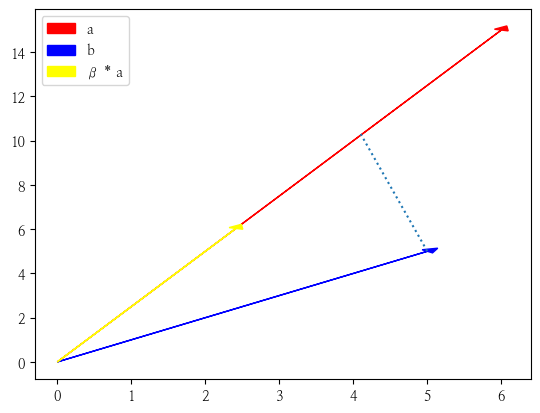

In [12]:
v    = np.array([6, 15])
w    = np.array([5,  5])

beta         = np.dot(v.T, w) / np.dot(v.T, v)
beta_v       = beta * v
orthogonal_v = w - beta_v

print(f'β         :       {beta}')
print(f'β * v     :   {beta_v}')
print(f'v - β * v : {orthogonal_v}')

plt.arrow( 0, 0,  6, 15, head_width = .2, head_length = .2, color = 'red', label = 'a')
plt.arrow( 0, 0,  5,  5, head_width = .2, head_length = .2, color = 'blue', label = 'b')
plt.arrow( 0, 0, beta_v[0], beta_v[1], head_width = .2, head_length = .2, color = 'yellow', label = 'β * a')
plt.plot([4.1, 5], [10.3, 5], ':')
plt.legend()

# **99. 참고자료**
## **99-1. 도서** 
- 개발자를 위한 실전 선형대수학 | 마이크. X. 코헨 저, 장정호 역 / 한빛 미디어

## **99-2. 논문, 학술지**

## **99-3. 웹 사이트**

## **99-4. 데이터셋 출처**
